<a href="https://colab.research.google.com/github/Utsav01111/Playstore_app_review_analysis/blob/main/Utsav_Ponda_Playstore_App_review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


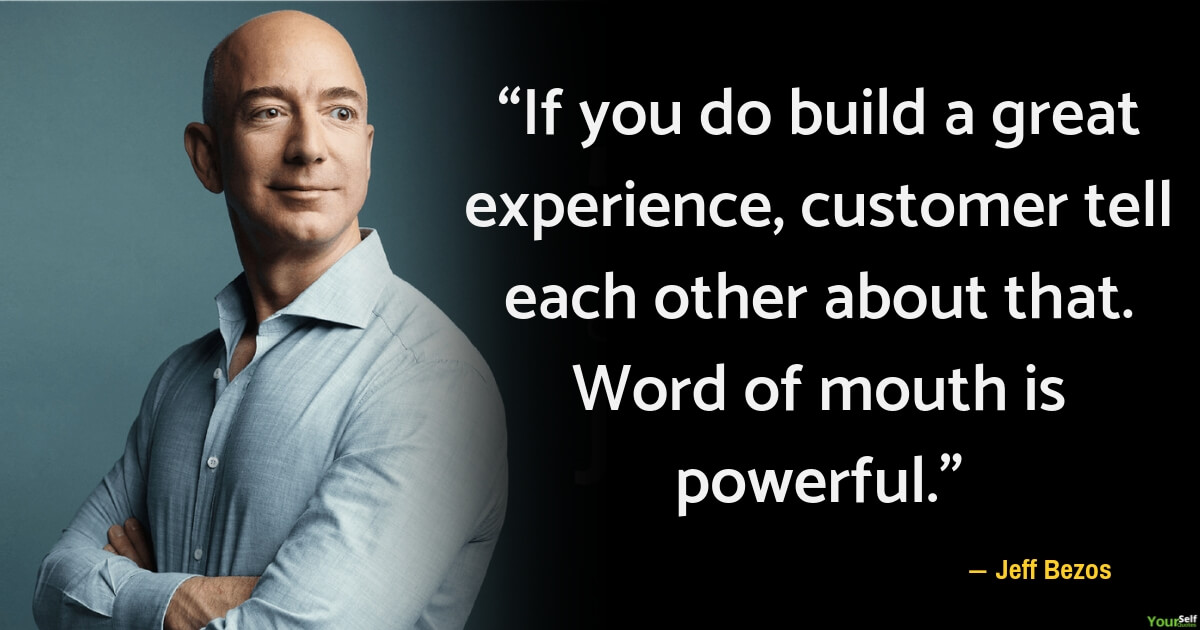

# Since the reign of digital revolution, we are more connected to internet. In the fast changing economy, business, organisations, jobs, and most of the work is transformed online. we can demand almost anything with single click.

 
## *   Hungry? Grab a pizza from Zomato, Swiggy, Foodpanda etc. Provides fast delivery, safe and hygenic with maintaining qaulity standards.

## *   want lifestyle wears, Groceries, Electronics, almost anything you wish ? Amazon is there..

## *   Trip to Goa with 3 idiots or 3 musketiers ? MakemyTrip is there.



 






# The above Quote perfectly hints that for a successful company, customer experience is important.

# Below are key questions are important for every company to make successful business.

1.   who is the target customer and What are the needs of customer ?
2.   what are the likes and dislikes ? 
3.   what are the reviews and feedbacks ?
4.   is the customer retained ?
5.   how much customer is satisfied the service / product ?


 

 
 
  

# Step : 1  INTRODUCTION TO DATA

Firstly let's get to know data. While I was analyzing the data, I used Pandas library.

*   info(): It informs about data columns and data types.
*   head(): It returns the first five data.
*   tail(): It returns the last five data.
*   columns : It returns data columns.
*   shape : It gives number of rows and columns in a tuble.




In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


In [4]:
dir_path_playstore = '/content/drive/MyDrive/Colab Notebooks/EDA Project/Playstore App Review Analysis/Play Store Data.csv'

In [5]:
dir_path_reviews = '/content/drive/MyDrive/Colab Notebooks/EDA Project/Playstore App Review Analysis/User Reviews.csv'

In [6]:
df_playstore = pd.read_csv(dir_path_playstore)
df_reviews = pd.read_csv(dir_path_reviews)

# Let's See the Meta data of both Play Store and User Reviews.

In [7]:
df_playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


 Now, we deep dive into data contents of both data frames.

In [9]:
df_playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
df_playstore.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [11]:
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [12]:
df_reviews.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [13]:
df_playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [14]:
df_playstore.shape

(10841, 13)

# 2. Cleaning Data - Dataset can contain missing data, numerical string value, various cues. If we can clean them, we can make analysis easy.

Content Rating

In [15]:
df_playstore.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

we can see above how many null values are there in each columns, ratings have the highest 1474 null values, and other columns such as type, content rating and android ver have few null values. 

In [16]:
# We see spaces between two words in some columns names and may throw error in operations so we removed it  
df_playstore.columns=df_playstore.columns.str.replace(' ','')

In [17]:
df_playstore['ContentRating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: ContentRating, dtype: int64

In [18]:
# There is only one Nan value in ContentRating so we replace with 'Everyone'
df_playstore.ContentRating.fillna(value='Everyone',inplace=True)

In [19]:
df_playstore['Rating'].mean()

4.193338315362448

In [20]:
# we replace nan values in Rating with mean rating value to avoid operational errors
df_playstore.Rating.fillna(value=4.1,inplace=True)

Reviews

In [21]:
df_playstore['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

Here we need to convert dtype : object to float to make mathematical operations error free.

In [22]:
#df_playstore['Reviews'].astype(float)

while converting above code into float we observed that '3.0M' is string data in Reviews column which is invalid and throws ValueError.
so we have to replace 3.0M to 30,00,000. 

In [23]:
# lets first find column number to replace into actual value 
df_playstore[df_playstore['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,NaN


In [24]:
df_playstore['Reviews'] = df_playstore['Reviews'].str.replace('M', '', regex=True).astype(float)

We see in column number 10472 category is 1.9 which is outliar because it is not category name, also rating is 19 given which must be between 0 to 5, type is 0 given instead it should be free or paid, price is Everyone  instead of numerical value, genres should be string value instead of datetime value. Since there are 5 columns which have wrong data values so it is better to drop this row.

In [25]:
df_playstore = df_playstore.drop(10472)

In [26]:
df_playstore['Reviews']

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10840, dtype: float64

Installs

In [27]:
df_playstore['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10840, dtype: object

In the installs column we can see that there is '+' sign which should be removed to get correct values for operation. And also data type is object which we will convert to float for analyzing.

In [28]:
df_playstore['Installs'] = df_playstore['Installs'].str.replace("['+,']", '', regex=True).astype(float)

In [29]:
df_playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            10840 non-null  object 
 1   Category       10840 non-null  object 
 2   Rating         10840 non-null  float64
 3   Reviews        10840 non-null  float64
 4   Size           10840 non-null  object 
 5   Installs       10840 non-null  float64
 6   Type           10839 non-null  object 
 7   Price          10840 non-null  object 
 8   ContentRating  10840 non-null  object 
 9   Genres         10840 non-null  object 
 10  LastUpdated    10840 non-null  object 
 11  CurrentVer     10832 non-null  object 
 12  AndroidVer     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.2+ MB


Finally, most of data cleaning is done. but in the info part we have Last updated, currentver, android ver and size which will not use, since it will not affect in analysing data. so we can drop them.

In [30]:
df_playstore.drop(labels=['LastUpdated','CurrentVer','AndroidVer'], axis=1,inplace=True)

Size

In [31]:
df_playstore.drop(labels=['Size'], axis=1,inplace=True)

In [32]:
df_playstore.head()

,App,Category,Rating,Reviews,Installs,Type,Price,ContentRating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,10000.0,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,5000000.0,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,50000000.0,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000.0,Free,0,Everyone,Art & Design;Creativity


In [33]:
#df_playstore.columns=df_playstore.columns.str.replace(' ','')

Price

In the Price column we found dollar sign while converting to float so we remove $ sign. 

In [34]:
df_playstore['Price']=df_playstore.Price.apply(lambda x:x.strip('$')).astype(float)

In [35]:
df_playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            10840 non-null  object 
 1   Category       10840 non-null  object 
 2   Rating         10840 non-null  float64
 3   Reviews        10840 non-null  float64
 4   Installs       10840 non-null  float64
 5   Type           10839 non-null  object 
 6   Price          10840 non-null  float64
 7   ContentRating  10840 non-null  object 
 8   Genres         10840 non-null  object 
dtypes: float64(4), object(5)
memory usage: 846.9+ KB


After Cleaning Playstore data now lets dive into User Reviews Data Set

In [36]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [37]:
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Here in the User review data, there is reviews by each user for each app is provided in form of Translated review which is comment made by user, sentiment which has polls like positive, negative and neutral, and then there is polarity where values range between -1 to 1 indicating like and dislike value and subjectivity value ranges between 0 to 1 indicating how much user enjoys using app. 

In [38]:
df_reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [39]:
df_reviews.shape

(64295, 5)

As there are Null values in 4 columns of Data frame, we will keep rows which have all non-null values for analysing data.

In [40]:
df_reviews.dropna(thresh=5,inplace=True)

In [41]:
df_reviews.shape

(37427, 5)

In [42]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


# Some Data Visualisation 

What is the ratio of Free apps and Paid apps distribution in play store ?

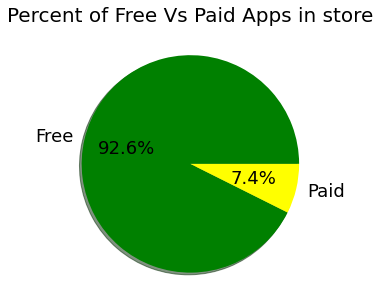

In [43]:
plt.figure(figsize=(10,5))
labels = df_playstore['Type'].value_counts(sort = True).index
sizes = df_playstore['Type'].value_counts(sort = True)
colors = ["green","yellow"]
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0,textprops={'fontsize': 18})

plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

The above Pie-Chart represents percentage of Free apps are 92.6% and paid apps are 7.4% in dataset.

Now lets check frequency of ratings distribution through distribution curve

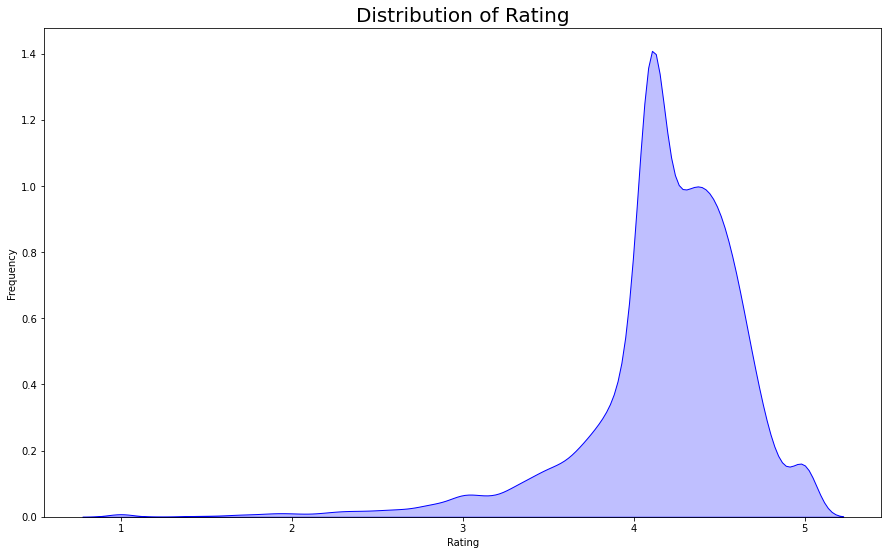

In [44]:
#code here
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df_playstore.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

As a result we find 4.1 has highest frequency and represents overall rating of play store.

Now lets see which are top 10 most installed apps

In [45]:
df_playstore[['App', 'Installs']].sort_values(by='Installs',ascending = False).head(10)

,App,Installs
3896,Subway Surfers,1.000000e+09
3943,Facebook,1.000000e+09
335,Messenger – Text and Video Chat for Free,1.000000e+09
3523,Google Drive,1.000000e+09
3565,Google Drive,1.000000e+09
2884,Google Photos,1.000000e+09
3665,YouTube,1.000000e+09
2853,Google Photos,1.000000e+09
4234,Skype - free IM & video calls,1.000000e+09
3687,Google Play Movies & TV,1.000000e+09


It seems like Top 10 most installs apps have almost billion installs and all values are nearly equal so no point to plot here. But we can plot by each category that way we can playround with each category.

First state all unique categories 

In [46]:
df_playstore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [47]:
def findtop10incategory(str):
    str = str.upper()
    top10 = df_playstore[df_playstore['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(9,9))
    plt.title(f'Top 10 Installed Apps in {str}',size = 18);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

Now after defining function, we can now play around with changing category names to find top installed apps in that category.

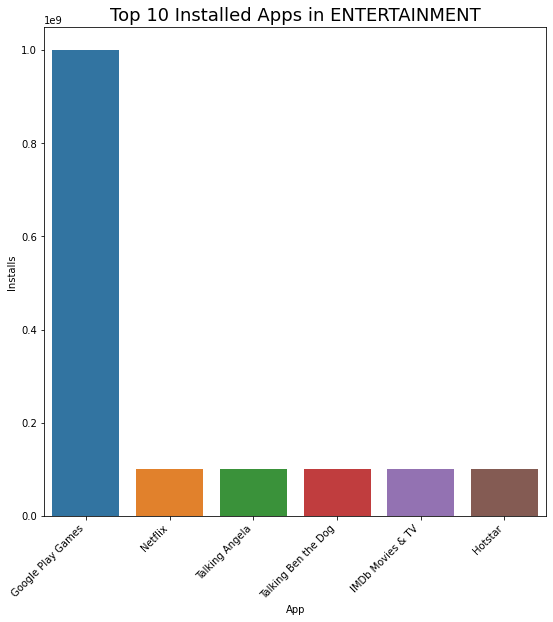

In [48]:
findtop10incategory('ENTERTAINMENT')

Now lets playaround some visualisation with User reviews. 

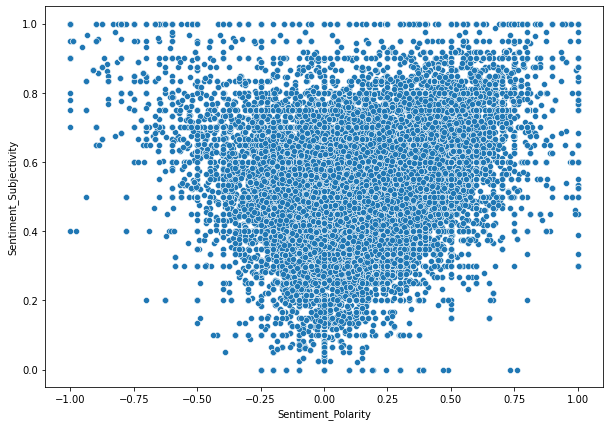

In [49]:
plt.rcParams['figure.figsize'] = (10, 7)
sns.scatterplot(x=df_reviews['Sentiment_Polarity'],y=df_reviews['Sentiment_Subjectivity'])

Above scatterplot represents most of apps lying between sentiment subjectivity of 0.4 or above and sentiment polarity of 0 or above. so we can filter apps based on sentiment subjectivity and polarity tend to be more successful.

In [50]:
x=pd.DataFrame(df_reviews['Sentiment'].value_counts())
x

,Sentiment
Positive,23998
Negative,8271
Neutral,5158


([<matplotlib.patches.Wedge at 0x7fed3f154c50>,
 [Text(-0.4720901319930675, 0.9935446176567856, 'Positive'),
  Text(0.011680069551688514, -1.0999379873316804, 'Negative'),
  Text(0.9985013967377232, -0.46151377088101725, 'Neutral')],
 [Text(-0.257503708359855, 0.5419334278127921, '64.1%'),
  Text(0.006370947028193734, -0.5999661749081893, '22.1%'),
  Text(0.5446371254933035, -0.25173478411691846, '13.8%')])

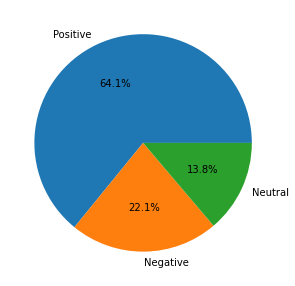

In [51]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.pie(x['Sentiment'],labels=x.index,autopct='%1.1f%%')

In [52]:
df_playstore.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.071816,0.055838,-0.020834
Reviews,0.071816,1.000000,0.643122,-0.009667
Installs,0.055838,0.643122,1.000000,-0.011689
Price,-0.020834,-0.009667,-0.011689,1.000000


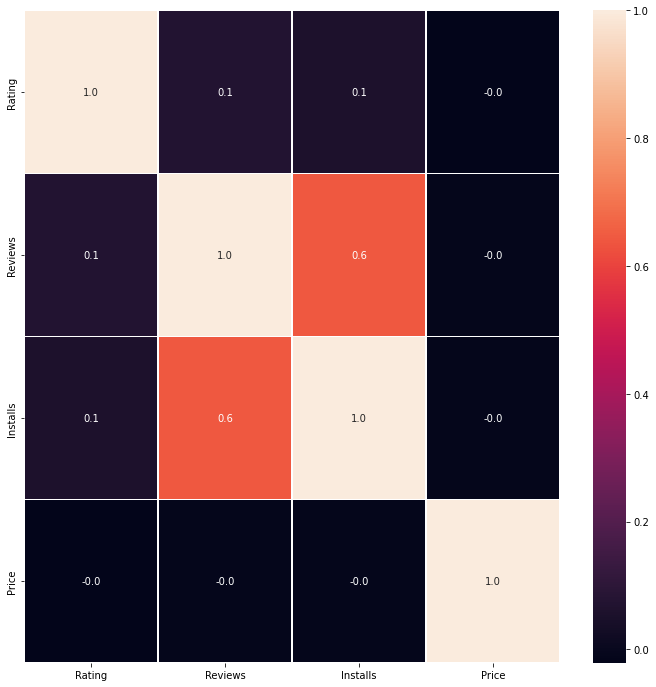

In [53]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_playstore.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()